In [19]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

In [2]:
flowers = load_iris()
dir(flowers)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df = pd.DataFrame(flowers.data, columns=flowers.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df['target'] = flowers.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df['flower'] = df.target.apply(lambda x: flowers.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
df.flower.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
setosa = df[df.target == 0]
versicolor = df[df.target == 1]
virginica = df[df.target == 2]
setosa.shape

(50, 6)

In [7]:
import matplotlib.pyplot as plt

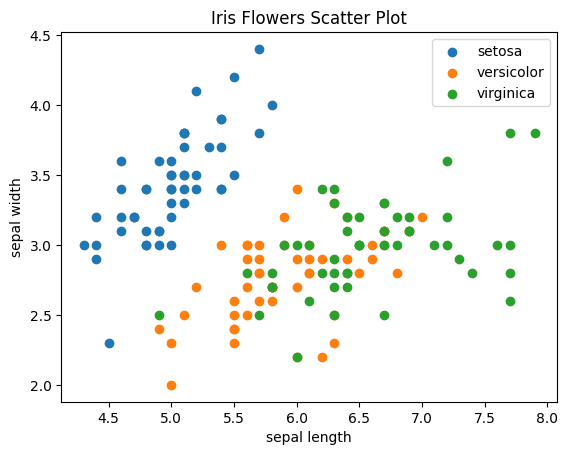

In [16]:
plt.title('Iris Flowers Scatter Plot')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(setosa['sepal length (cm)'], setosa['sepal width (cm)'])
plt.scatter(versicolor['sepal length (cm)'], versicolor['sepal width (cm)'])
plt.scatter(virginica['sepal length (cm)'], virginica['sepal width (cm)'])
plt.legend(['setosa','versicolor', 'virginica'])
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['target','flower'], axis='columns'), df.target, test_size=0.20)
x_test.shape

(30, 4)

In [20]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [21]:
knn.score(x_test, y_test)

1.0

In [22]:
knn.score(x_train, y_train)

0.9666666666666667

In [23]:
from sklearn.metrics import confusion_matrix

In [26]:
y_predicted = knn.predict(x_test)
cm=confusion_matrix(y_test, y_predicted)
cm

array([[14,  0,  0],
       [ 0, 11,  0],
       [ 0,  0,  5]])

In [27]:
import seaborn as sns

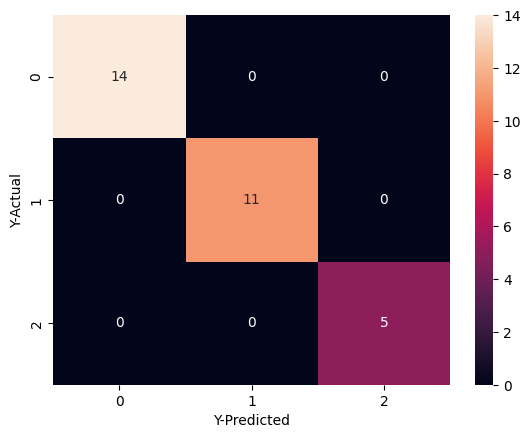

In [28]:
sns.heatmap(cm, annot = True)
plt.xlabel('Y-Predicted')
plt.ylabel('Y-Actual')
plt.show()

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

